In [3]:
import os
import glob
import altair as alt
import pandas as pd
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)

In [18]:
team = "Chicago Bears"
team_city = "Chicago"
team_underscore = "_".join(team.lower().split(" "))

team_opp = "Washington Commanders"
team_opp_alt = team_opp
team_city_opp = "Washington"
team_opp_underscore = "_".join(team_opp.lower().split(" "))

team_date = "20221011"
player_date = "20221011"
nfl_date = "20221011"
# bears
# background etc.
primary_color = "#0B162A" 
secondary_color = "#C83803"

opp_primary_color = "#5A1414"
opp_secondary_color = "#FFB612"

In [19]:
cols = ["Date", "Opponent", "Result", "W/L", "Div", "Spread", "Total", "Money"]
df_schedule = pd.read_csv(f"../data/team_ranks/_nfl_team_{team_underscore}__{team_date}.csv")
df_schedule["Opponent"] = np.where(df_schedule.Location.eq("Away"), "@" + df_schedule.Opponent, df_schedule.Opponent)
record_str = df_schedule[~df_schedule.Div.isnull()].iloc[-1]["W/L"]

In [20]:
df_schedule = df_schedule.fillna("")
df_schedule = df_schedule.head(n=7)[cols]

df_schedule_opp = pd.read_csv(f"../data/team_ranks/_nfl_team_{team_opp_underscore}__{team_date}.csv")
df_schedule_opp["Opponent"] = np.where(df_schedule_opp.Location.eq("Away"), "@" + df_schedule_opp.Opponent, df_schedule_opp.Opponent)
record_opp_str = df_schedule_opp[~df_schedule_opp.Div.isnull()].iloc[-1]["W/L"]

df_schedule_opp = df_schedule_opp.fillna("")
df_schedule_opp = df_schedule_opp.head(n=7)[cols]

In [21]:
file_path = f"../data/team_ranks/_nfl_player_stat_*{team_date}.csv"
file_paths = glob.glob(os.path.join(file_path))

pds = list()
for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
_df_player = pd.concat(pds)

../data/team_ranks/_nfl_player_stat_games_played_20221011.csv
../data/team_ranks/_nfl_player_stat_games_started_20221011.csv
../data/team_ranks/_nfl_player_stat_quarterback_wins_20221011.csv
../data/team_ranks/_nfl_player_stat_quarterback_losses_20221011.csv
../data/team_ranks/_nfl_player_stat_quarterback_ties_20221011.csv
../data/team_ranks/_nfl_player_stat_quarterback_winning_percentage_20221011.csv
../data/team_ranks/_nfl_player_stat_passing_plays_completed_20221011.csv
../data/team_ranks/_nfl_player_stat_passing_plays_attempted_20221011.csv
../data/team_ranks/_nfl_player_stat_passing_gross_yards_20221011.csv
../data/team_ranks/_nfl_player_stat_passing_touchdowns_20221011.csv
../data/team_ranks/_nfl_player_stat_touchdown_percentage_20221011.csv
../data/team_ranks/_nfl_player_stat_passing_plays_intercepted_20221011.csv
../data/team_ranks/_nfl_player_stat_interception_percentage_20221011.csv
../data/team_ranks/_nfl_player_stat_games_with_an_interception_20221011.csv
../data/team_ranks

In [22]:
cols = ["Player", "Pos", "Rank", "Stat", "Value"]

player_stats_list = ["passing-gross-yards", "passing-touchdowns", "rushing-net-yards", "rushing-touchdowns", "defense-total-tackles", "defense-sacks"]
_df_player["_stat"] = _df_player.url.str.split("/", expand=True)[3]
_df_player["Stat"] = _df_player._stat.str.split("-").str.join(" ").str.title()
_df_player = _df_player[_df_player._stat.isin(player_stats_list)]
_df_player["Stat"] = _df_player.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Total", "")\
.str.replace("Defense", "")\
.str.replace("Gross", "")\
.str.replace("Net", "")
_df_player["Value"] = pd.to_numeric(_df_player.Value)
_df_player = _df_player[_df_player.Value.gt(0)]

df_player = _df_player[_df_player.Team.eq(team)][cols]
df_player_opp = _df_player[_df_player.Team.eq(team_opp)][cols]

In [23]:
df.Team.unique()

array(['Las Vegas Raiders', 'Dallas Cowboys', 'Kansas City Chiefs',
       'Buffalo Bills', 'Baltimore Ravens', 'Cleveland Browns',
       'New York Giants', 'Tampa Bay Buccaneers', 'Atlanta Falcons',
       'Carolina Panthers', 'Houston Texans', 'Cincinnati Bengals',
       'Seattle Seahawks', 'New England Patriots', 'Jacksonville Jaguars',
       'Denver Broncos', 'New York Jets', 'Philadelphia Eagles',
       'Detroit Lions', 'Minnesota Vikings', 'Pittsburgh Steelers',
       'Los Angeles Rams', 'Miami Dolphins', 'Los Angeles Chargers',
       'Tennessee Titans', 'New Orleans Saints', 'Green Bay Packers',
       'San Francisco 49ers', 'Chicago Bears', 'Washington Commanders',
       'Indianapolis Colts', 'Arizona Cardinals'], dtype=object)

In [24]:
file_path = f"../data/team_ranks/_nfl_stat*{nfl_date}.csv"
file_paths = glob.glob(os.path.join(file_path))
pds = list()
for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
df = pd.concat(pds)

../data/team_ranks/_nfl_stat_qb_sacked_pct_20221011.csv
../data/team_ranks/_nfl_stat_qb_sacked_per_game_20221011.csv
../data/team_ranks/_nfl_stat_points_per_game_20221011.csv
../data/team_ranks/_nfl_stat_average_scoring_margin_20221011.csv
../data/team_ranks/_nfl_stat_yards_per_point_20221011.csv
../data/team_ranks/_nfl_stat_yards_per_point_margin_20221011.csv
../data/team_ranks/_nfl_stat_points_per_play_20221011.csv
../data/team_ranks/_nfl_stat_points_per_play_margin_20221011.csv
../data/team_ranks/_nfl_stat_touchdowns_per_game_20221011.csv
../data/team_ranks/_nfl_stat_red_zone_scoring_attempts_per_game_20221011.csv
../data/team_ranks/_nfl_stat_red_zone_scores_per_game_20221011.csv
../data/team_ranks/_nfl_stat_red_zone_scoring_pct_20221011.csv
../data/team_ranks/_nfl_stat_extra_point_attempts_per_game_20221011.csv
../data/team_ranks/_nfl_stat_extra_points_made_per_game_20221011.csv
../data/team_ranks/_nfl_stat_passing_touchdown_pct_20221011.csv
../data/team_ranks/_nfl_stat_two_point_c

In [25]:
def_stats = {
    "opponent-points-per-game":.6,
    "opponent-points-per-play":1,
    "opponent-1st-half-points-per-game":1.5,
    "opponent-2nd-half-points-per-game":1.6,
    "opponent-rushing-touchdowns-per-game":1.7,
    "opponent-passing-touchdowns-per-game":1.8,
    "opponent-yards-per-game":1.85,
    "opponent-yards-per-play":1.9,
    "opponent-rushing-yards-per-game":2,
    "opponent-yards-per-rush-attempt":2.1,
    "opponent-passing-yards-per-game":2.6,
    "opponent-yards-per-pass-attempt":3,
    "defensive-points-per-game":4,
    "sacks-per-game":10,
    "interceptions-per-game":11,
    "opponent-fumbles-per-game":12,
    }


In [26]:
stats = {
    "points-per-game":2,
    "points-per-play":3.5,
    "1st-half-points-per-game":3.9,
    "2nd-half-points-per-game":4,
    "rushing-touchdowns-per-game":4.1,
    "passing-touchdowns-per-game":4.2,
    "yards-per-game":4.5,
    "yards-per-play":4.8,
    "rushing-yards-per-game":4.9,
    "yards-per-rush-attempt":5,
    "rushing-play-pct":5.5,
    "passing-yards-per-game":5.6,
    "yards-per-pass-attempt":6,
    "passing-play-pct":7,
    "qb-sacked-per-game":10,
    "interceptions-thrown-per-game":11,
    "fumble-per-game":12,
    "penalties-per-game":13
    }

In [27]:
df["_stat"] = df.url.str.split("/", expand=True)[3]
df["Stat"] = df._stat.str.split("-").str.join(" ").str.title()
df["Stat"] = df.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Interceptions", "Int")

In [28]:
def generate_off_def_df(dft, gstats=stats):
    dft["_order"] = dft._stat.map(gstats)
    dfp = dft[dft._stat.isin(gstats)]
    dfp_opp = dfp[dfp.Team.eq(team_city_opp)].sort_values("_order")
    dfp = dfp[dfp.Team.eq(team_city)].sort_values("_order")
    return dfp, dfp_opp

def generate_spider(df, primarycolor, plot_name, custom_data_columns=["2021", "2022"], visible=True):
    return go.Scatterpolar(
    r=df.Rank.tolist(),
    theta=df.Stat.tolist(),
    visible=visible,
    fill='toself',
    customdata=df[custom_data_columns],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primarycolor, font_size=16, font_color="#A5ACAF"),
    name=plot_name,
    marker=dict(color=primarycolor, size=10,line=dict(width=2))
)

def generate_table(df, header_color, background_color, sel_cols=["Stat", "Rank", "2022", "2021"], columnwidth=[.40, .2, .2, .2], visible=True):
    if sel_cols is not None:
        df = df[sel_cols]
    return go.Table(
        header=dict(values=df.columns, fill_color=header_color, font_color="white"), 
        columnwidth=columnwidth, visible=visible,
        cells=dict(values=df.T.values, fill_color=background_color, font_color="white", height=35, align=["left", "center"])
    )


In [31]:
import os

In [33]:
os.getcwd()

'/home/jkonovsky/development/notebooks/chicago_bears_nerd/visuals'

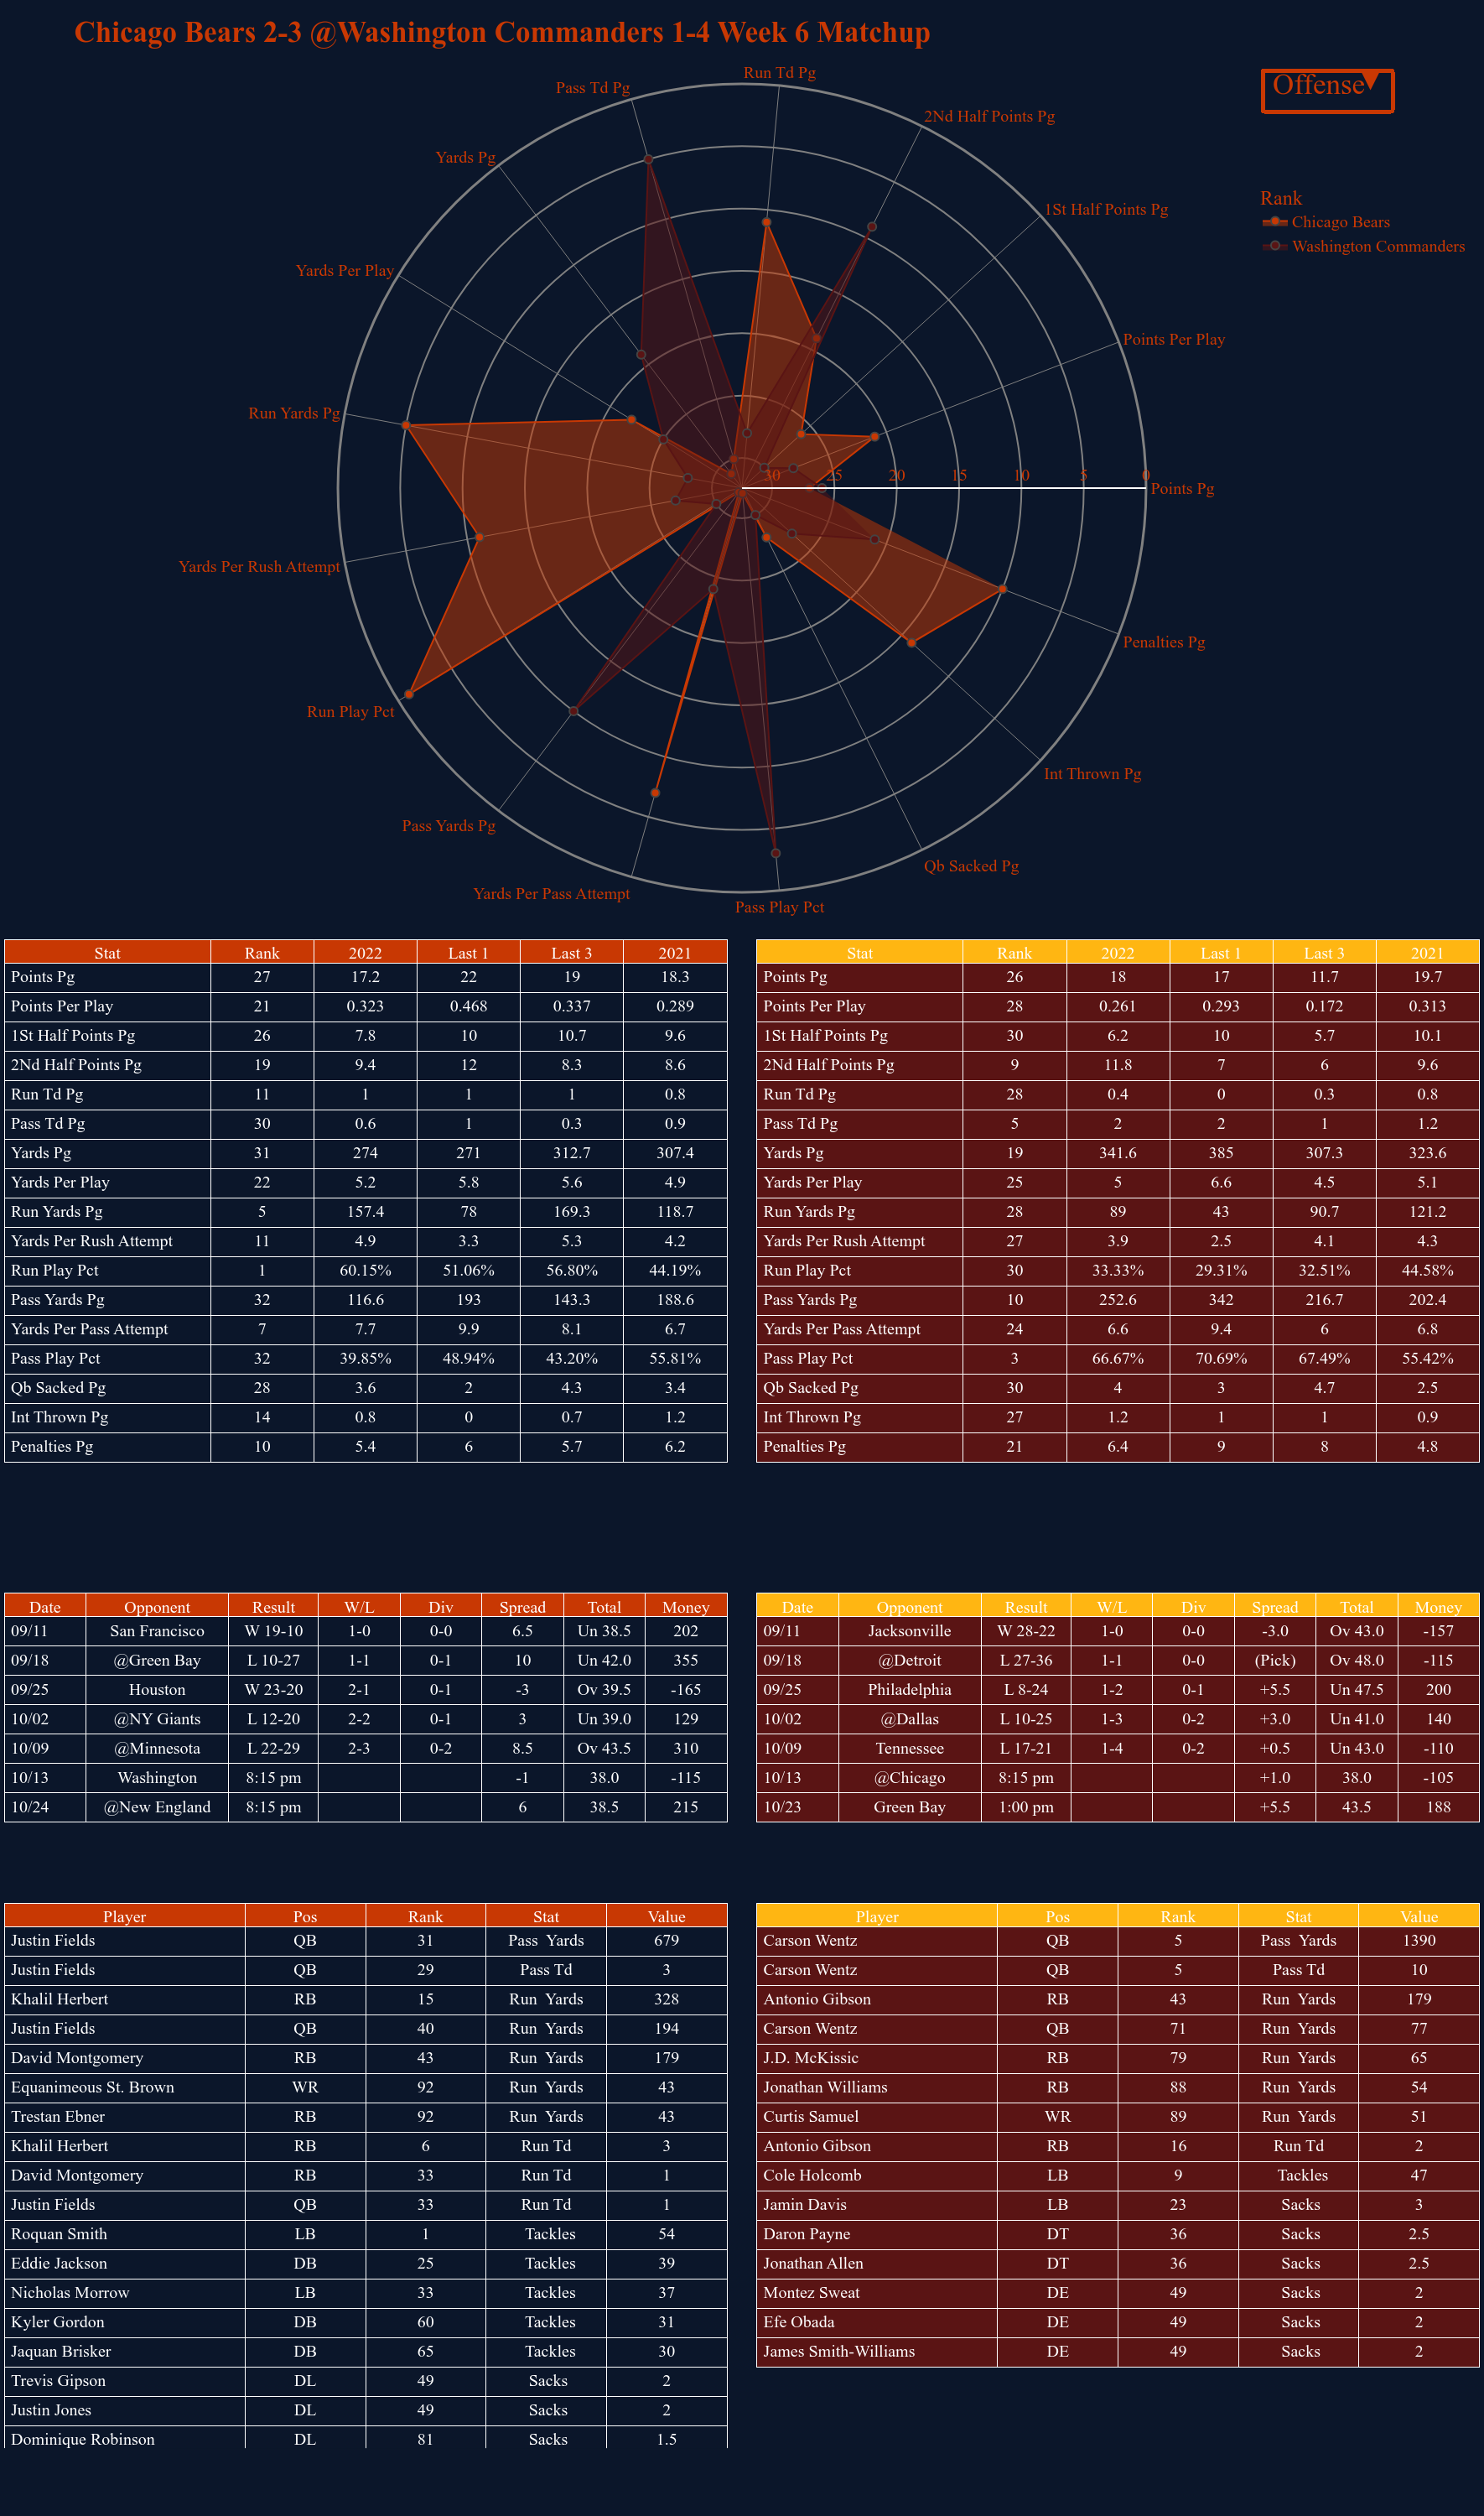

In [30]:
df_plot_def, df_plot_opp_def = generate_off_def_df(df, def_stats)
df_plot, df_plot_opp = generate_off_def_df(df, stats)
week = df_schedule[df_schedule.Opponent.str.contains(team_city_opp)].index.max()+1



fig = make_subplots(rows=4, cols=2, 
                    row_heights=[.40, .30, .13, .27], 
                    horizontal_spacing=.02, 
                    vertical_spacing=.02,
                    specs=[
                        [{"colspan": 2, "type":"scatterpolar"}, None],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                    ]
                   )

opp_color = opp_primary_color
sel_cols = ["Stat", "Rank", "2022", "Last 1", "Last 3", "2021"]

scat = generate_spider(df_plot, primarycolor=secondary_color, plot_name=team)
scat_opp = generate_spider(df_plot_opp, primarycolor=opp_primary_color, plot_name=team_opp)
scat_def = generate_spider(df_plot_def, primarycolor=secondary_color, plot_name=team, visible=False)
scat_opp_def = generate_spider(df_plot_opp_def, primarycolor=opp_primary_color, plot_name=team_opp, visible=False)

table = generate_table(df_plot, header_color=secondary_color, background_color=primary_color, sel_cols=sel_cols)
table_opp = generate_table(df_plot_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, sel_cols=sel_cols)

table_def = generate_table(df_plot_def,  header_color=secondary_color, background_color=primary_color, visible=False, sel_cols=sel_cols)
table_opp_def = generate_table(df_plot_opp_def,  header_color=opp_secondary_color, background_color=opp_primary_color, visible=False, sel_cols=sel_cols)

table_schedule = generate_table(df_schedule, header_color=secondary_color, background_color=primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_player = generate_table(df_player, header_color=secondary_color, background_color=primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)

table_opp_schedule = generate_table(df_schedule_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_opp_player = generate_table(df_player_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)



fig.add_trace(scat)
fig.add_trace(scat_opp)

fig.add_trace(scat_def)
fig.add_trace(scat_opp_def)

fig.add_trace(table, row=2, col=1)
fig.add_trace(table_opp, row=2, col=2)

fig.add_trace(table_def, row=2, col=1)
fig.add_trace(table_opp_def, row=2, col=2)


fig.add_trace(table_schedule, row=3, col=1)
fig.add_trace(table_player, row=4, col=1)

fig.add_trace(table_opp_schedule, row=3, col=2)
fig.add_trace(table_opp_player, row=4, col=2)


updatemenus = [{'buttons': [{'method': 'update',
  'label': 'Offense',
  'visible': True,
  'args': [{'visible': [True, True, False, False, True, True, False, False, True, True, True, True]}
          ]},
 {'method': 'update',
  'label': 'Defense',
  'visible': True,
  'args': [{'visible': [False, False, True, True, False, False, True, True, True, True, True, True], "execute":False}
          ]}
],
                'active':0,
                'direction': 'down',
                'showactive': False,
                "pad":{"r": 5, "t": 20},
                "xanchor":"left",
                "yanchor":"bottom",
                "x":.85,
                "y":.99,
                "font_size":35,
                "bgcolor":primary_color,
                "bordercolor":secondary_color,
                "borderwidth":5,
               }
]


fig.update_layout(
    title= f"<b>{team} {record_str} @{team_opp} {record_opp_str} Week {week} Matchup </b>",
    font_family="Times New Roman",
    updatemenus=updatemenus,
    height=3000,
    margin=dict(
        l=5,
        r=5,
    ),
    showlegend=True,
    title_font_size=35,
    legend_title="Rank",
    font_size = 20,
    legend=dict(yanchor="top",y=0.96,xanchor="left", x=0.85),

    font=dict(color=secondary_color),
    polar = dict(
      bgcolor = primary_color,
      angularaxis = dict(linewidth = 3, showline=True, gridcolor = "grey", linecolor="grey"),
      radialaxis = dict(side = "counterclockwise", showline = True, linewidth = 2, gridcolor = "grey", gridwidth = 2, dtick=5, autorange="reversed"),        
    ),
    paper_bgcolor = primary_color
)

fig.to_json("chart_foo.json")
fig.show()